In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Digits es un dataset que contiene información de imagenes representadas en arrays de numeros
digits = load_digits()

In [65]:
# Accediendo al primer array de la primera imagen
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [66]:
# reshape toma el array o vector y lo convierte en una matriz de 8x8
image = np.reshape( digits.data[0], (8,8) )

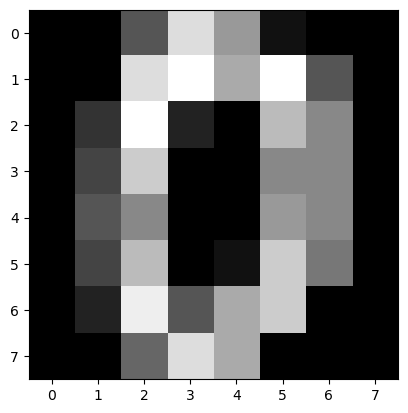

In [67]:
# imshow visualiza matrices de píxeles, mapas de calor y otras
# representaciones visuales de datos bidimensionales (matriz)
# cmap indica el mapa de color que usaremos
plt.imshow( image, cmap = 'gray' )

In [68]:
# target de load_digits() contiene información sobre número expresado en la imagen de un array
digits.target[0]

0

Esplit de Datos en Train y Test

In [3]:
# train_test_split sirve para dividir un grupo de datos en datos de entrenamiento y datos de prueba
from sklearn.model_selection import train_test_split
# train_test_split recive 4 argumentos:
# Matriz de datos, vector de etiquetas o clasificación, porcentaje para el test, aletoriedad con un valor constante (0)
x_train, x_test, y_train, y_test = train_test_split( digits.data, digits.target, test_size=0.2, random_state=0 )

# Nota: El vector de etiquetas se usa para las variables y_train, y_test que son los numeros que representa el array de una imagen

In [57]:
# .shape proporciona información sobre la forma de un arreglo multidimensional

# Las dimension de nuestros datos originales eran de 1797 arrays con 64 elementos cada uno
x_datos = digits.data.shape

# Con train_test_split indicamos que el 20% de x_datos serán para test y 80% para train
# 80% de los datos
x_datos_train = x_train.shape
# 20% de los datos
x_datos_test = x_test.shape

print("datos Originales", x_datos, "\ndatos de Entrenamiento", x_datos_train, "\ndatos de Test",x_datos_test)


datos Originales (1797, 64) 
datos de Entrenamiento (1437, 64) 
datos de Test (360, 64)


Entrenamiento del modelo de Regresión Logística

In [4]:
# Guardamos el modelo de regresión logistica en una variable (logistic_rec)
logistic_rec = LogisticRegression()
# Usamos fit para realizar el entrenamineto
logistic_rec.fit(x_train, y_train)

# Nota: No te preocupes si sale STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
# tambien puedes escalar o normalizar los datos x_train, y_train

/home/johnny/anaconda3/envs/regresionLogistica/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluación del modelo

In [5]:
# Haciendo una predicción con el set de test
predictions = logistic_rec.predict(x_test)

In [6]:
# Importamos una matriz de confusión
from sklearn.metrics import confusion_matrix
# Comparamos el resultado de predicción realizada con x_test con los resultados reales de y_test
cm = confusion_matrix(y_test, predictions)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

Visualización de Datos

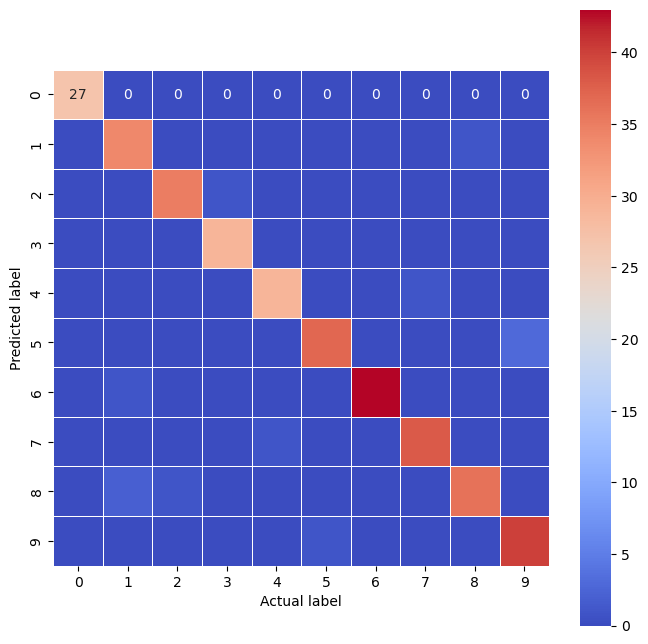

In [7]:
# "figure" crea un lienzo en la que se pueden colocar gráficos
# con "figsize" le indicamos un tamaño de 8x8 pulgadas
plt.figure(figsize=(8,8))
# heatmap visualiza matrices de datos bidimensionales como un mapa de colores
# annot=True muestra los valores en las celdas
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='coolwarm')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()